In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_AN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,NaN,3.1,1.5,NaN
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,NaN,2.5,5.0,NaN
147,NaN,3.0,5.2,NaN
148,NaN,3.4,5.4,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	57
float64		column 2	0
float64		column 3	0
float64		column 4	57


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,93.000000,150.000000,150.000000,93.000000
mean,5.765591,3.054000,3.758667,1.112903
std,0.698989,0.433594,1.764420,0.700501
min,4.600000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.300000,3.300000,5.100000,1.600000
max,7.300000,4.400000,6.900000,2.500000


<AxesSubplot:>

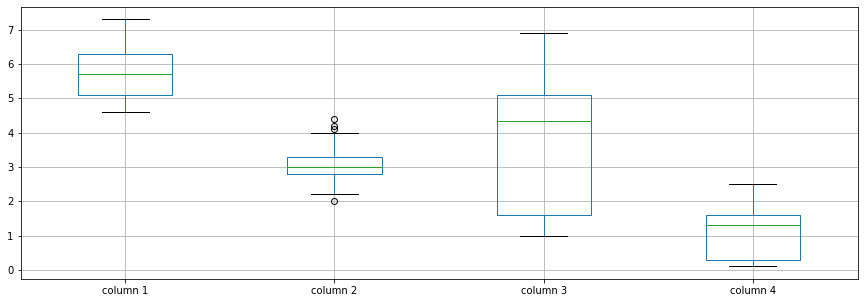

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.765591
column 2    3.054000
column 3    3.758667
column 4    1.112903
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.271985,0.863838,0.829605
column 2,-0.271985,1.000000,-0.420516,-0.471152
column 3,0.863838,-0.420516,1.000000,0.967159
column 4,0.829605,-0.471152,0.967159,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+69,4+69+69,4+69+69+69,4+69+69+69+69,4+69+69+69,4+69+69,4+69,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.585056516859266
Epoch: 1 , loss: 11.5749814775255
Epoch: 2 , loss: 11.653526306152344
Epoch: 3 , loss: 11.584394454956055
Epoch: 4 , loss: 11.534853299458822
Epoch: 5 , loss: 11.452131165398491
Epoch: 6 , loss: 11.534181594848633
Epoch: 7 , loss: 11.615832328796387
Epoch: 8 , loss: 11.652964274088541
Epoch: 9 , loss: 11.629931767781576
Epoch: 10 , loss: 11.551700168185764
Epoch: 11 , loss: 11.547121365865072
Epoch: 12 , loss: 11.521415604485405
Epoch: 13 , loss: 11.578617837693956
Epoch: 14 , loss: 11.591016875372993
Epoch: 15 , loss: 11.645482275221083
Epoch: 16 , loss: 11.585105260213217
Epoch: 17 , loss: 11.522443453470865
Epoch: 18 , loss: 11.517871856689453
Epoch: 19 , loss: 11.594726032680935
Epoch: 20 , loss: 11.671762042575413
Epoch: 21 , loss: 11.587228775024414
Epoch: 22 , loss: 11.46163993411594
Epoch: 23 , loss: 11.540175967746311
Epoch: 24 , loss: 11.544454998440212
Epoch: 25 , loss: 11.

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.000000
3,-4.358520,0.0,0.0,-0.017924
4,0.000000,0.0,0.0,0.000000
...,...,...,...,...
145,0.000000,0.0,0.0,0.000000
146,-6.137410,0.0,0.0,-1.784871
147,-6.285995,0.0,0.0,-1.836750
148,-6.084420,0.0,0.0,-2.213543


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(46.16218305571607, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.47271421637294914

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.4,0.200000
1,4.900000,3.0,1.4,0.200000
2,4.700000,3.2,1.3,0.200000
3,0.241480,3.1,1.5,0.182076
4,5.000000,3.6,1.4,0.200000
...,...,...,...,...
145,6.700000,3.0,5.2,2.300000
146,0.162590,2.5,5.0,0.115129
147,0.214005,3.0,5.2,0.163250
148,0.115580,3.4,5.4,0.086457


In [20]:
imputations[-1].to_excel("Iris_AN_20(imp).xlsx", index=False, header=False)